In [1]:
# Library Import

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
google = pd.read_csv("Goog.csv", usecols = [0,5], names = ['Date', 'Price'], sep=",", header = 0)

print(google.head())
print(google.shape)

         Date       Price
0  2017-05-19  934.010010
1  2017-05-22  941.859985
2  2017-05-23  948.820007
3  2017-05-24  954.960022
4  2017-05-25  969.539978
(252, 2)


In [3]:
nasdaq = pd.read_csv("Nasdaq.csv", usecols = [0,5], names = ['Date', 'Price'], sep=",", header = 0)
print(nasdaq.head())
print(nasdaq.shape)

         Date        Price
0  2017-05-19  6083.700195
1  2017-05-22  6133.620117
2  2017-05-23  6138.709961
3  2017-05-24  6163.020020
4  2017-05-25  6205.259766
(252, 2)


In [4]:
# Need to do new price - old price, ie row 2 - row 1 etc

google_returns = (np.array(google["Price"][0:-1], np.float) / np.array(google["Price"][1:], np.float)) - 1
nasdaq_returns = (np.array(nasdaq["Price"][0:-1], np.float) / np.array(nasdaq["Price"][1:], np.float)) - 1

In [5]:
google_returns.shape

(251,)

In [6]:
# Put this new price into the datasets

google["Returns"] = np.append(google_returns, np.nan)
nasdaq["Returns"] = np.append(nasdaq_returns, np.nan)

google.tail()

,Date,Price,Returns
247,2018-05-14,1100.199951,0.019430
248,2018-05-15,1079.229980,-0.002348
249,2018-05-16,1081.770020,0.002948
250,2018-05-17,1078.589966,0.011469
251,2018-05-18,1066.359985,NaN


In [7]:
# Now pull in the treasury bond data

tbond = pd.read_csv("TBOND.csv", header = 0, usecols = [0, 5], names = ['Date', 'Price'], sep = ",")
tbond.shape

(251, 2)

In [8]:
# Then calculate the risk free rate of return

tbond["Returns"] = tbond["Price"] / 100
tbond.shape

(251, 3)

In [9]:
google.index = google["Date"]
nasdaq.index = nasdaq["Date"]
tbond.index = tbond["Date"]

In [10]:
# Remove the last row as it is not applicable (null value as need new data - old data)
google_test = google["Returns"][0:-1]
nasdaq_test = nasdaq["Returns"][0:-1]
tbond_test = tbond["Returns"]

In [11]:
print(google_test.shape, nasdaq_test.shape, tbond_test.shape)

(251,) (251,) (251,)


In [12]:
google_fix = (google_test - tbond_test).dropna()

nasdaq_fix = (nasdaq_test - tbond_test).dropna()

In [13]:
# Import in the regression pack from sklearn

from sklearn.linear_model import SGDRegressor,LinearRegression

In [14]:
# Use the SGD Regression model to find a coefficient for the linear regression fit

regression = SGDRegressor(eta0=0.1,max_iter=100000,fit_intercept=False)

regression.fit((nasdaq_fix).values.reshape(-1,1), (google_fix))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=False, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [15]:
# Show the computed regression coefficient

regression.coef_

line = regression.coef_

line

array([0.88637645])

[]

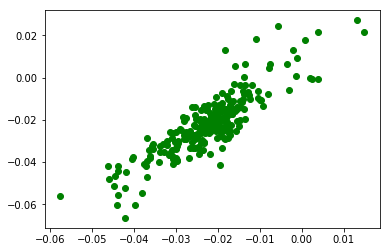

In [16]:
# Plot the data!

plt.plot(nasdaq_fix, google_fix, 'go')

x = nasdaq_fix
y = google_fix

plt.plot()